In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from math import log
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
import sys
import pydotplus
from pydotplus import graph_from_dot_data
from IPython.display import Image
from io import StringIO

1. Считываем данные

In [2]:
data = pd.read_csv("HW/2/train.csv")
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

2. Разбираемся с datetime

In [4]:
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).day
data['hour'] = pd.DatetimeIndex(data['datetime']).hour
data = data.drop(columns=['datetime'])
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


3. Ищем коррелирующие признаки

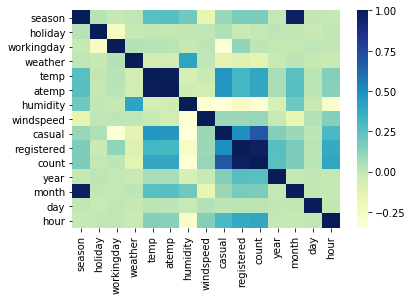

In [5]:
sn.heatmap(data.corr(), cmap="YlGnBu")

In [6]:
data.drop(["atemp", "registered"], axis=1, inplace=True)

In [7]:
data.head(10)

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,count,year,month,day,hour
0,1,0,0,1,9.84,81,0.0000,3,16,2011,1,1,0
1,1,0,0,1,9.02,80,0.0000,8,40,2011,1,1,1
2,1,0,0,1,9.02,80,0.0000,5,32,2011,1,1,2
3,1,0,0,1,9.84,75,0.0000,3,13,2011,1,1,3
4,1,0,0,1,9.84,75,0.0000,0,1,2011,1,1,4
5,1,0,0,2,9.84,75,6.0032,0,1,2011,1,1,5
6,1,0,0,1,9.02,80,0.0000,2,2,2011,1,1,6
7,1,0,0,1,8.20,86,0.0000,1,3,2011,1,1,7
8,1,0,0,1,9.84,75,0.0000,1,8,2011,1,1,8
9,1,0,0,1,13.12,76,0.0000,8,14,2011,1,1,9


In [8]:
X = data.drop(columns=["count"])
Y = data["count"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=27)

In [9]:
res_tree = DecisionTreeRegressor(random_state=27)
res_tree.fit(X_train.values, Y_train.values)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=27, splitter='best')

In [11]:
res_pred = res_tree.predict(X_test)
metrics.mean_squared_error(res_pred, Y_test), metrics.mean_squared_error(res_tree.predict(X_train), Y_train)

(2260.558175137783, 0.0)

In [12]:
dot_file = StringIO()
export_graphviz(res_tree, out_file=dot_file,  max_depth=5, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_file.getvalue())  
graph.write_png("/home/elavelina/Documents/DSML_2018-master/HW/2/task2_tree1.png")

True

In [13]:
params = {"criterion": ["mse", "mae"],
              "min_samples_split": [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007],
              "min_samples_leaf": range(1, 5)
              }
tree_cv = GridSearchCV(res_tree, params, scoring='neg_mean_squared_error', cv=5)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=27, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'mae'], 'min_samples_split': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007], 'min_samples_leaf': range(1, 5)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [14]:
tree_cv.best_score_

-1941.3701834826268

In [15]:
tree_cv.best_estimator_

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=0.002, min_weight_fraction_leaf=0.0,
           presort=False, random_state=27, splitter='best')

In [16]:
tree_cv.best_params_

{'criterion': 'mse', 'min_samples_leaf': 4, 'min_samples_split': 0.002}

In [17]:
res_pred_best = tree_cv.best_estimator_.predict(X_test)
metrics.mean_squared_error(res_pred_best, Y_test), metrics.mean_squared_error(tree_cv.best_estimator_.predict(X_train), Y_train)

(1698.0631865653165, 794.1925461331466)

Строим ещё раз дерево

In [18]:
res_tree.set_params(**tree_cv.best_params_)
res_tree.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=0.002, min_weight_fraction_leaf=0.0,
           presort=False, random_state=27, splitter='best')

In [19]:
dot_file = StringIO()
export_graphviz(res_tree, out_file=dot_file,  max_depth=5, feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_file.getvalue())  
graph.write_png("/home/elavelina/Documents/DSML_2018-master/HW/2/task2_tree2.png")

True